# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import open_weather_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [5]:
cities

['butaritari',
 'saint-augustin',
 'tete',
 'barentsburg',
 'cidreira',
 'thunder bay',
 'plavinas',
 'quatre cocos',
 'east london',
 'varlamovo',
 'barrow',
 'lavrentiya',
 'baft',
 'vila franca do campo',
 'bengkulu',
 'sao filipe',
 'griffith',
 'scarborough',
 'klaksvik',
 'taolanaro',
 'ginda',
 'namatanai',
 'san patricio',
 'sug-aksy',
 'boden',
 'jamestown',
 'magaria',
 'longyearbyen',
 'morro bay',
 'ushuaia',
 'saleaula',
 'mount isa',
 'bethel',
 'katsuura',
 'hobart',
 'tasiilaq',
 'poum',
 'petropavlovsk-kamchatskiy',
 'atuona',
 'sentyabrskiy',
 'wajima',
 'tessalit',
 'tuktoyaktuk',
 'norman wells',
 'tatawin',
 'geraldton',
 'hilo',
 'albany',
 'guerrero negro',
 'sawai madhopur',
 'rikitea',
 'arkhara',
 'bambous virieux',
 'cherskiy',
 'oistins',
 'ahipara',
 'thompson',
 'egvekinot',
 'vaitupu',
 'sinnamary',
 'portobelo',
 'sijunjung',
 'mercedes',
 'illoqqortoormiut',
 'busselton',
 'te anau',
 'campbell river',
 'bombay',
 'comodoro rivadavia',
 'carnot',
 'bluf

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={open_weather_API_key}&units={units}&q="
#print(requests.get(query_url + "London").json(),indent=4, sort_keys=True)
requests.get(query_url + "vikhorevka").json()

{'coord': {'lon': 101.16, 'lat': 56.12},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': -23.44,
  'feels_like': -31.7,
  'temp_min': -23.8,
  'temp_max': -23.01,
  'pressure': 1031,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 2.24, 'deg': 60},
 'clouds': {'all': 1},
 'dt': 1580670733,
 'sys': {'type': 1,
  'id': 8892,
  'country': 'RU',
  'sunrise': 1580692123,
  'sunset': 1580723362},
 'timezone': 28800,
 'id': 2013399,
 'name': 'Vikhorevka',
 'cod': 200}

In [ ]:

# set up lists to hold reponse info
lat =[]
temp = []
humidity = []
cloudiness = []
windspeed = []
foundcity = []
    

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        print(f"Found lat for {city}, appending stats")
        temp.append(response["main"]["temp"])
        print(f"Found temp for {city}, appending stats")
        humidity.append(response['main']['humidity'])
        print(f"Found humidity for {city}, appending stats")
        cloudiness.append(response['clouds']['all'])
        print(f"Found cloudiness for {city}, appending stats")
        windspeed.append(response['wind']['speed'])
        print(f"Found windspeed for {city}, appending stats")
        foundcity.append(response['name'])
        print(f"appending city")
    except:
        print(f"{city} not found")
        pass

Found lat for butaritari, appending stats
Found temp for butaritari, appending stats
Found humidity for butaritari, appending stats
Found cloudiness for butaritari, appending stats
Found windspeed for butaritari, appending stats
appending city
Found lat for saint-augustin, appending stats
Found temp for saint-augustin, appending stats
Found humidity for saint-augustin, appending stats
Found cloudiness for saint-augustin, appending stats
Found windspeed for saint-augustin, appending stats
appending city
Found lat for tete, appending stats
Found temp for tete, appending stats
Found humidity for tete, appending stats
Found cloudiness for tete, appending stats
Found windspeed for tete, appending stats
appending city
barentsburg not found
Found lat for cidreira, appending stats
Found temp for cidreira, appending stats
Found humidity for cidreira, appending stats
Found cloudiness for cidreira, appending stats
Found windspeed for cidreira, appending stats
appending city
Found lat for thunder 

Found lat for atuona, appending stats
Found temp for atuona, appending stats
Found humidity for atuona, appending stats
Found cloudiness for atuona, appending stats
Found windspeed for atuona, appending stats
appending city
sentyabrskiy not found
Found lat for wajima, appending stats
Found temp for wajima, appending stats
Found humidity for wajima, appending stats
Found cloudiness for wajima, appending stats
Found windspeed for wajima, appending stats
appending city
Found lat for tessalit, appending stats
Found temp for tessalit, appending stats
Found humidity for tessalit, appending stats
Found cloudiness for tessalit, appending stats
Found windspeed for tessalit, appending stats
appending city
Found lat for tuktoyaktuk, appending stats
Found temp for tuktoyaktuk, appending stats
Found humidity for tuktoyaktuk, appending stats
Found cloudiness for tuktoyaktuk, appending stats
Found windspeed for tuktoyaktuk, appending stats
appending city
Found lat for norman wells, appending stats
Fo

Found lat for kulhudhuffushi, appending stats
Found temp for kulhudhuffushi, appending stats
Found humidity for kulhudhuffushi, appending stats
Found cloudiness for kulhudhuffushi, appending stats
Found windspeed for kulhudhuffushi, appending stats
appending city
Found lat for goderich, appending stats
Found temp for goderich, appending stats
Found humidity for goderich, appending stats
Found cloudiness for goderich, appending stats
Found windspeed for goderich, appending stats
appending city
Found lat for erzin, appending stats
Found temp for erzin, appending stats
Found humidity for erzin, appending stats
Found cloudiness for erzin, appending stats
Found windspeed for erzin, appending stats
appending city
Found lat for rio gallegos, appending stats
Found temp for rio gallegos, appending stats
Found humidity for rio gallegos, appending stats
Found cloudiness for rio gallegos, appending stats
Found windspeed for rio gallegos, appending stats
appending city
Found lat for vaini, appendin

Found lat for mahebourg, appending stats
Found temp for mahebourg, appending stats
Found humidity for mahebourg, appending stats
Found cloudiness for mahebourg, appending stats
Found windspeed for mahebourg, appending stats
appending city
Found lat for puerto ayora, appending stats
Found temp for puerto ayora, appending stats
Found humidity for puerto ayora, appending stats
Found cloudiness for puerto ayora, appending stats
Found windspeed for puerto ayora, appending stats
appending city
Found lat for new norfolk, appending stats
Found temp for new norfolk, appending stats
Found humidity for new norfolk, appending stats
Found cloudiness for new norfolk, appending stats
Found windspeed for new norfolk, appending stats
appending city
Found lat for strood, appending stats
Found temp for strood, appending stats
Found humidity for strood, appending stats
Found cloudiness for strood, appending stats
Found windspeed for strood, appending stats
appending city
Found lat for souillac, appending 

Found lat for damaturu, appending stats
Found temp for damaturu, appending stats
Found humidity for damaturu, appending stats
Found cloudiness for damaturu, appending stats
Found windspeed for damaturu, appending stats
appending city
Found lat for georgetown, appending stats
Found temp for georgetown, appending stats
Found humidity for georgetown, appending stats
Found cloudiness for georgetown, appending stats
Found windspeed for georgetown, appending stats
appending city
Found lat for raudeberg, appending stats
Found temp for raudeberg, appending stats
Found humidity for raudeberg, appending stats
Found cloudiness for raudeberg, appending stats
Found windspeed for raudeberg, appending stats
appending city
Found lat for yellowknife, appending stats
Found temp for yellowknife, appending stats
Found humidity for yellowknife, appending stats
Found cloudiness for yellowknife, appending stats
Found windspeed for yellowknife, appending stats
appending city
Found lat for brandenburg, appendi

Found lat for kerema, appending stats
Found temp for kerema, appending stats
Found humidity for kerema, appending stats
Found cloudiness for kerema, appending stats
Found windspeed for kerema, appending stats
appending city
Found lat for saquena, appending stats
Found temp for saquena, appending stats
Found humidity for saquena, appending stats
Found cloudiness for saquena, appending stats
Found windspeed for saquena, appending stats
appending city
Found lat for kavaratti, appending stats
Found temp for kavaratti, appending stats
Found humidity for kavaratti, appending stats
Found cloudiness for kavaratti, appending stats
Found windspeed for kavaratti, appending stats
appending city
Found lat for tombouctou, appending stats
Found temp for tombouctou, appending stats
Found humidity for tombouctou, appending stats
Found cloudiness for tombouctou, appending stats
Found windspeed for tombouctou, appending stats
appending city
Found lat for ust-nera, appending stats
Found temp for ust-nera,

Found lat for bonavista, appending stats
Found temp for bonavista, appending stats
Found humidity for bonavista, appending stats
Found cloudiness for bonavista, appending stats
Found windspeed for bonavista, appending stats
appending city
Found lat for yichang, appending stats
Found temp for yichang, appending stats
Found humidity for yichang, appending stats
Found cloudiness for yichang, appending stats
Found windspeed for yichang, appending stats
appending city
Found lat for lagoa, appending stats
Found temp for lagoa, appending stats
Found humidity for lagoa, appending stats
Found cloudiness for lagoa, appending stats
Found windspeed for lagoa, appending stats
appending city
kamenskoye not found
Found lat for daru, appending stats
Found temp for daru, appending stats
Found humidity for daru, appending stats
Found cloudiness for daru, appending stats
Found windspeed for daru, appending stats
appending city
Found lat for praia, appending stats
Found temp for praia, appending stats
Fou

Found lat for avera, appending stats
Found temp for avera, appending stats
Found humidity for avera, appending stats
Found cloudiness for avera, appending stats
Found windspeed for avera, appending stats
appending city
Found lat for vitim, appending stats
Found temp for vitim, appending stats
Found humidity for vitim, appending stats
Found cloudiness for vitim, appending stats
Found windspeed for vitim, appending stats
appending city
Found lat for high rock, appending stats
Found temp for high rock, appending stats
Found humidity for high rock, appending stats
Found cloudiness for high rock, appending stats
Found windspeed for high rock, appending stats
appending city
Found lat for ambilobe, appending stats
Found temp for ambilobe, appending stats
Found humidity for ambilobe, appending stats
Found cloudiness for ambilobe, appending stats
Found windspeed for ambilobe, appending stats
appending city
Found lat for jati, appending stats
Found temp for jati, appending stats
Found humidity f

Found lat for sao jose da coroa grande, appending stats
Found temp for sao jose da coroa grande, appending stats
Found humidity for sao jose da coroa grande, appending stats
Found cloudiness for sao jose da coroa grande, appending stats
Found windspeed for sao jose da coroa grande, appending stats
appending city
Found lat for cooma, appending stats
Found temp for cooma, appending stats
Found humidity for cooma, appending stats
Found cloudiness for cooma, appending stats
Found windspeed for cooma, appending stats
appending city
Found lat for lompoc, appending stats
Found temp for lompoc, appending stats
Found humidity for lompoc, appending stats
Found cloudiness for lompoc, appending stats
Found windspeed for lompoc, appending stats
appending city
Found lat for vysokogornyy, appending stats
Found temp for vysokogornyy, appending stats
Found humidity for vysokogornyy, appending stats
Found cloudiness for vysokogornyy, appending stats
Found windspeed for vysokogornyy, appending stats
appe

marcona not found
Found lat for pascagoula, appending stats
Found temp for pascagoula, appending stats
Found humidity for pascagoula, appending stats
Found cloudiness for pascagoula, appending stats
Found windspeed for pascagoula, appending stats
appending city
Found lat for guarapari, appending stats
Found temp for guarapari, appending stats
Found humidity for guarapari, appending stats
Found cloudiness for guarapari, appending stats
Found windspeed for guarapari, appending stats
appending city
Found lat for port elizabeth, appending stats
Found temp for port elizabeth, appending stats
Found humidity for port elizabeth, appending stats
Found cloudiness for port elizabeth, appending stats
Found windspeed for port elizabeth, appending stats
appending city
Found lat for esperance, appending stats
Found temp for esperance, appending stats
Found humidity for esperance, appending stats
Found cloudiness for esperance, appending stats
Found windspeed for esperance, appending stats
appending c

In [17]:
print(requests.get(query_url + "kappa").json())

{'coord': {'lon': -16.1, 'lat': 13.18}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 74.84, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 270}, 'clouds': {'all': 31}, 'dt': 1580672622, 'sys': {'type': 1, 'id': 2367, 'country': 'GM', 'sunrise': 1580628648, 'sunset': 1580670311}, 'timezone': 0, 'id': 2413023, 'name': 'Kappa', 'cod': 200}


In [18]:
weather_data = pd.DataFrame({
    "City": foundcity,
    "Latitude":lat,
    "Temperature (F)":temp,
    "Humidity (%)":humidity,
    "Windspeed (mph)":windspeed,
    "Cloudiness (%)":cloudiness
})
weather_data.head()

,City,Latitude,Temperature (F),Humidity (%),Windspeed (mph),Cloudiness (%)
0,Butaritari,3.07,82.71,79,16.40,61
1,Saint-Augustin,51.23,20.05,88,24.23,100
2,Tete,-16.16,82.40,74,6.93,20
3,Cidreira,-30.18,76.33,79,19.08,0
4,Thunder Bay,48.40,33.37,80,9.17,90


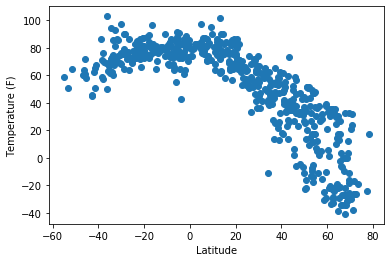

In [19]:
#Plotting Temperature (F) vs. Latitude, analyzing the Temperature (F) of cities over a range of latitude
# As we go away from the equator, the temperature is lower toward the northern hemisphere at this time of the year and warmer in the southern hemisphere during this time.
plt.scatter(weather_data['Latitude'],weather_data['Temperature (F)'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("Temperature (F) vs Latitude.png")
plt.show()

In [ ]:
#Plotting Humidity (%) vs. Latitude
plt.scatter(weather_data['Latitude'],weather_data['Humidity (%)'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Humidity (%) vs Latitude.png")
plt.show()

#There is no correlation between humidity and latitudes of different cities around the world at this time of the year

In [ ]:
#Plotting Cloudiness (%) vs. Latitude
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness (%)'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Cloudiness (%) vs Latitude.png")
plt.show()

#no conclusion/suggestion based on data comparing cloudiness of different cities in different latitudes.

In [ ]:
#Plotting Wind Speed (mph) vs. Latitude
plt.scatter(weather_data['Latitude'],weather_data['Windspeed (mph)'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.savefig("Windspeed (mph) vs Latitude.png")
plt.show()
#no conclusion/suggestion based on data comparing windspeed of different cities in different latitudes.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_data.to_csv("weatherpy_data.csv")

In [ ]:
northern = []
southern = []

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression